In [8]:
import pandas as pd 
import seaborn as sns 

metal = pd.read_csv("./beginner_datasets/archive/metal_bands_2017.csv", encoding="latin1", index_col=0)

In [4]:
metal.shape

(5000, 7)

In [5]:
metal.sample(2)

,Unnamed: 0,band_name,fans,formed,origin,split,style
236,236,The Gathering,409,1989,The Netherlands,-,"Doom,Death doom,Atmospheric gothic,Experimenta..."
1331,1331,Darkwell,38,1999,Austria,1999,Gothic


In [6]:
metal.head()
#colonna Unnamed0 va tolta o indicizzata lo si puà fare da pd.read_csv

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death


In [9]:
#tolto colonna unnamed
metal.head()

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death


C:\Users\HOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fans', ylabel='Count'>

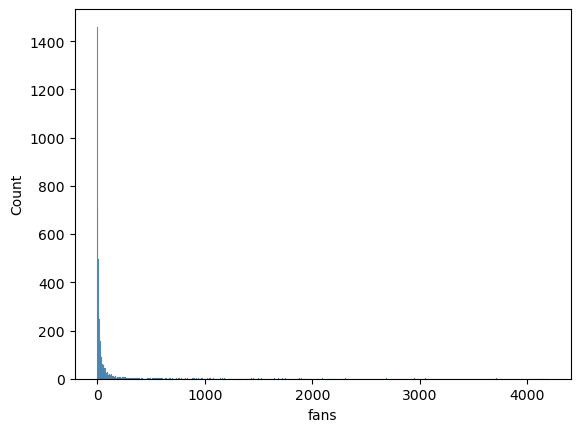

In [11]:
#numero fun per bad istogramma
sns.histplot(data=metal, x="fans")

In [15]:
# bar plot per band che suonano trash e progressive per paese origine 
filtro_gen = metal["style"].str.contains("Progressive") | metal["style"].str.contains("Trash")
metal_pt = metal.loc[filtro_gen]

In [17]:
# contine solo band che suonano progressiv o trash 
metal_pt.sample(3)

,band_name,fans,formed,origin,split,style
1371,Waltari,37,1986,Finland,1986,"Progressive thrash,Avantgarde,Alternative,Symp..."
3348,Beautality,5,2009,United Kingdom,-,"Atmospheric black,Progressive black"
4617,Erik Norlander,1,1993,USA,1993,Progressive


In [18]:
metal_pt_paese = metal.groupby("origin") 

In [23]:
# oggetto raggruppato 
metal_pt_paese

In [30]:
# fans per paese 
metal_pt_paese.fans.sum()

origin
Albania                       2
Andorra                     279
Argentina                   349
Armenia                       4
Australia                  5832
                          ...  
Ukraine, Canada               5
United Kingdom            44717
United Kingdom, Greece        2
United Kingdom, USA        1684
Venezuela                     1
Name: fans, Length: 113, dtype: int64

In [27]:
# fans per paese 
fan_origine = metal_pt_paese.fans.sum()

<Axes: ylabel='origin'>

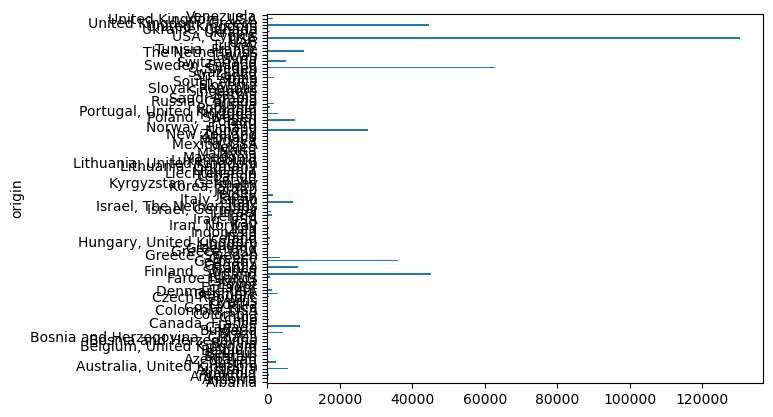

In [32]:
# plot barh per linee orizzontali
fan_origine.plot(kind="barh")

In [34]:
# istogramma per data di formazione 
metal.dtypes

band_name    object
fans          int64
formed       object
origin       object
split        object
style        object
dtype: object

In [37]:
# trasformo in type datetime
metal.formed.value_counts()

formed
2005    270
2007    265
2006    248
2008    227
2004    221
2003    217
2009    205
1998    203
2010    202
2001    189
1999    182
2002    179
2000    174
1995    169
1996    160
1997    159
1993    157
2011    153
2012    136
1994    132
2013    118
1989    102
1992    100
1990     98
2014     88
1991     77
1988     64
1985     60
1984     53
1986     53
1987     53
1983     42
1982     40
2015     36
1981     30
1979     26
1980     25
1976     17
1978     11
1977     11
1975      7
1968      7
1969      6
1972      5
2016      5
1973      4
-         4
1967      3
1974      3
1964      1
1965      1
1971      1
1970      1
Name: count, dtype: int64

In [58]:
# elimino i -
filtro_anno = metal.formed.str.contains("-")
# not filtro anno 
filtro_anno = ~filtro_anno
metal_anno = metal.loc[filtro_anno]
metal_anno.formed
# dopo aver creato il df anno sulla colonna formed applico la funzione int per trasformare il tipo di dato
metal_anno.formed = metal_anno.formed.apply(int)

C:\Users\HOME\AppData\Local\Temp\ipykernel_1932\3539101257.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metal_anno.formed = metal_anno.formed.apply(int)


<Axes: ylabel='Frequency'>

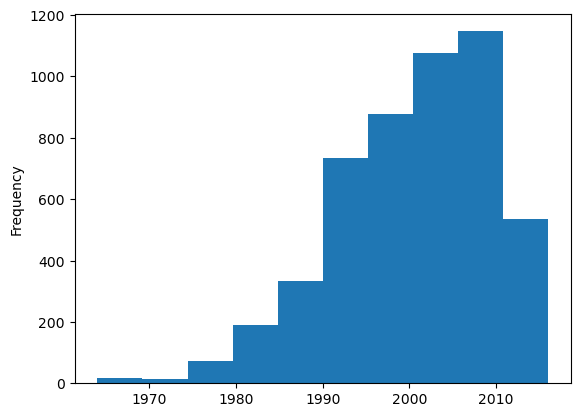

In [59]:
#plot con metodo df 
metal_anno.formed.plot(kind="hist")


C:\Users\HOME\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='formed', ylabel='Count'>

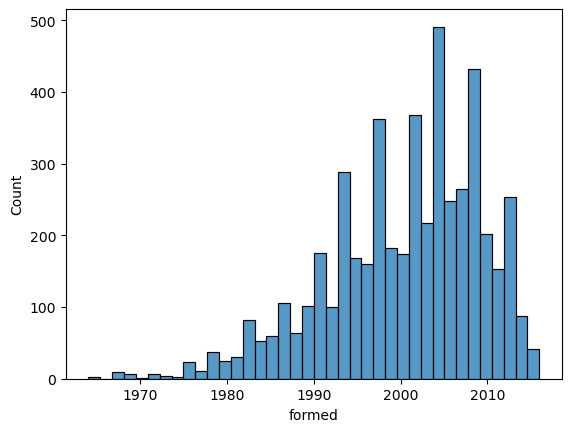

In [60]:
# plot con sns 
sns.histplot(data=metal_anno, x="formed")